# Mini Proyecto I  
**Fundamentos de Análisis y Cálculo Numérico**  

**Integrantes**:  
- Luz Amelia Ibarguen – 2380404  
- Katherine Lopez Unas – 2380339  
- Andres Mauricio Peña Lopez – 2380335

**Profesor**: Ing. Mateo Echeverry Correa  
**Semestre**: 2025-II  

*Predicción de aprobación de préstamos mediante Red Neuronal Artificial*

In [1]:
# PASO 1. CARGA DEL CSV DESDE GOOGLE DRIVE
import gdown
import os

# ID del archivo en Google Drive
file_id = "1h-mmgdfKERRObQPQAo4M-M5fVQk-kT8p"  
output = 'loan_approval_dataset.csv'

# Descargar solo si no existe localmente
if not os.path.exists(output):
    print("Descargando dataset desde Google Drive...")
    gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)
else:
    print("Dataset ya existe localmente")

# Cargar el archivo
import pandas as pd
df = pd.read_csv(output)
df.head()

Descargando dataset desde Google Drive...


Downloading...
From: https://drive.google.com/uc?id=1h-mmgdfKERRObQPQAo4M-M5fVQk-kT8p
To: C:\Users\CYS\OneDrive - correounivalle.edu.co\semestre 5\FUNDAMENTOS DE ANALISIS Y CALCULO NUMERICO\loan_approval_dataset.csv
100%|██████████| 384k/384k [00:00<00:00, 1.90MB/s]


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
# PASO 1. IMPORTACION DE LIBRERIAS Y CARGA DEL CSV

# Manejo de arreglos y de tablas
import numpy as np

# Graficos estadisticos
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual de los graficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [5]:
# PASO 2. LIMPIEZA DE DATOS

print("Forma del dataset:", df.shape)
print("\nInformación general:")
df.info()

print("\nValores nulos por columna:")
print(df.isnull().sum())

print("\nDuplicados:", df.duplicated().sum())

# se concluye que el dataset no tiene valores nulos ni duplicados, por tanto esto se omite

Forma del dataset: (4269, 13)

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10

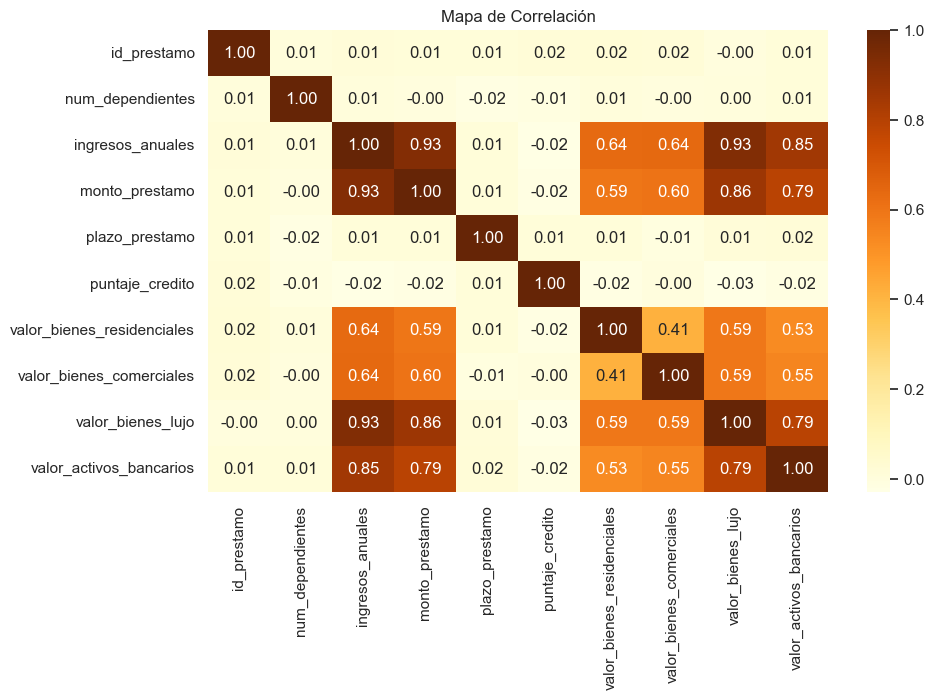

In [25]:
# PASO 3. EDA
df.describe()

# Seleccionar solo las columnas numéricas para el cálculo de correlación
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlOrBr', fmt='.2f')  # Amarillo-Naranja-Marrón
plt.title('Mapa de Correlación')
plt.show()

In [22]:
# PASO 4. TRANSFORMACION DE VARIABLES

# traduccion de las variables a español

traduccion = {
    'loan_id': 'id_prestamo',
    'no_of_dependents': 'num_dependientes',
    'education': 'educacion',
    'self_employed': 'trabajo_independiente',
    'income_annum': 'ingresos_anuales',
    'loan_amount': 'monto_prestamo',
    'loan_term': 'plazo_prestamo',
    'cibil_score': 'puntaje_credito',
    'residential_assets_value': 'valor_bienes_residenciales',
    'commercial_assets_value': 'valor_bienes_comerciales',
    'luxury_assets_value': 'valor_bienes_lujo',
    'bank_asset_value': 'valor_activos_bancarios',
    'loan_status': 'estado_prestamo'
}

df = df.rename(columns=traduccion)

# conteo de aprobados VS rechazados

# Limpiar nombres de columnas eliminando espacios en blanco al inicio/final
df.columns = df.columns.str.strip()

# Valores de cada estado del prestamo
print(df['estado_prestamo'].value_counts())
print("\nProporción:")

# Valores porcentuales de cada estado del prestamo
print(df['estado_prestamo'].value_counts(normalize=True).mul(100).round(2))

estado_prestamo
Approved    2656
Rejected    1613
Name: count, dtype: int64

Proporción:
estado_prestamo
Approved    62.22
Rejected    37.78
Name: proportion, dtype: float64


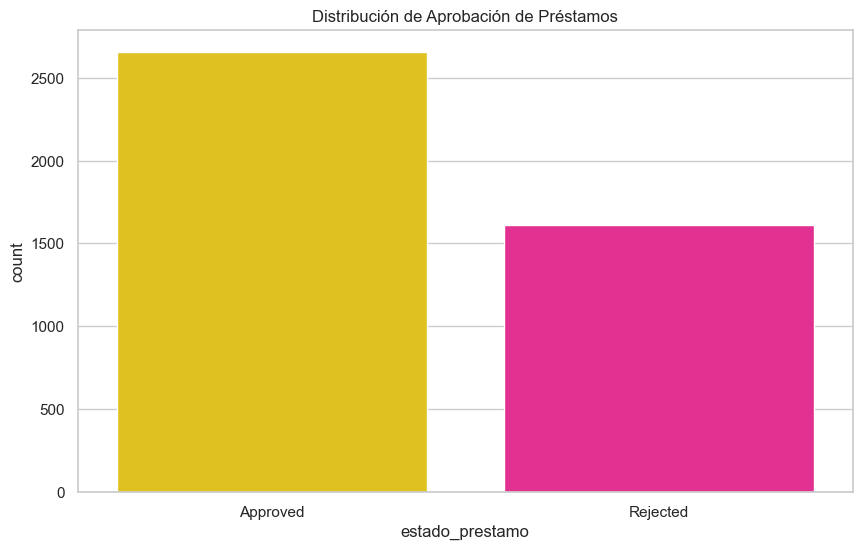

In [27]:
# Grafico de la distribucion de prestamos (Aprobado / NO Aprobado)

sns.countplot(x='estado_prestamo', data=df, hue='estado_prestamo', palette=['#FFD700', '#FF1493'], legend=False)
plt.title('Distribución de Aprobación de Préstamos')
plt.show()

In [10]:
# Limpiar nombres de columnas eliminando espacios en blanco al inicio/final
df.columns = df.columns.str.strip()

# Limpiar los valores de la columna 'estado_prestamo' en el DataFrame original
df['estado_prestamo'] = df['estado_prestamo'].str.strip()

# Separar variables predictoras (X) y variable objetivo (y)
X = df.drop('estado_prestamo', axis=1) # contiene todas las variables menos estado_prestamo
y = df['estado_prestamo']

# Convertir la variable objetivo a formato binario: Aprobado=1, No Aprobado=0
y = y.map({'Approved': 1, 'Rejected': 0})

# Verificar distribución de clases
y.value_counts()

estado_prestamo
1    2656
0    1613
Name: count, dtype: int64

In [11]:
# Codificar variables categóricas en X usando one-hot encoding.
# Se crean nuevas columnas binarias para cada categoría, excepto la primera (drop_first=True)
# para evitar multicolinealidad.
X = pd.get_dummies(X, columns=['educacion', 'trabajo_independiente'], drop_first=True)

X.columns.tolist()  # Ver las nuevas columnas generadas

# Nota:
# - 'educacion_Graduado' = 1 si es graduado, 0 si no.
# - 'trabajo_independiente_Si' = 1 si trabaja por cuenta propia, 0 si no.
# - esta celda solo se debe de ejecutar una vez (en caso de que lo ejecute mas de una vez, ejecute la celda anterior y vuelva a esta)

['id_prestamo',
 'num_dependientes',
 'ingresos_anuales',
 'monto_prestamo',
 'plazo_prestamo',
 'puntaje_credito',
 'valor_bienes_residenciales',
 'valor_bienes_comerciales',
 'valor_bienes_lujo',
 'valor_activos_bancarios',
 'educacion_ Not Graduate',
 'trabajo_independiente_ Yes']

In [12]:
# Estandarizar todas las variables numéricas de X:
# Cada columna queda con media = 0 y desviación estándar = 1.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Ajustar el scaler a X y transformar los datos
X_scaled = scaler.fit_transform(X)

# Convertir el resultado a DataFrame para conservar los nombres de las columnas
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [13]:
print("Forma de X:", X_scaled.shape)
print("Forma de y:", y.shape)
print("\nPrimeras filas de X escalado:")
X_scaled.head()

Forma de X: (4269, 12)
Forma de y: (4269,)

Primeras filas de X escalado:


,id_prestamo,num_dependientes,ingresos_anuales,monto_prestamo,plazo_prestamo,puntaje_credito,valor_bienes_residenciales,valor_bienes_comerciales,valor_bienes_lujo,valor_activos_bancarios,educacion_ Not Graduate,trabajo_independiente_ Yes
0,-1.731645,-0.294102,1.617979,1.633052,0.192617,1.032792,-0.780058,2.877289,0.832028,0.930304,-0.995559,-1.007288
1,-1.730834,-1.473548,-0.341750,-0.324414,-0.508091,-1.061051,-0.733924,-0.631921,-0.694993,-0.515936,1.004461,0.992765
2,-1.730022,0.295621,1.439822,1.610933,1.594031,-0.544840,-0.057300,-0.107818,1.996520,2.407316,-0.995559,-1.007288
3,-1.729211,0.295621,1.119139,1.721525,-0.508091,-0.771045,1.649637,-0.381263,0.897943,0.899533,-0.995559,-1.007288
4,-1.728399,1.475067,1.689242,1.002681,1.594031,-1.264055,0.757724,0.735304,1.568075,0.007172,1.004461,0.992765


In [14]:
# PASO 5. ARQUITECTURA RED NEURONAL

# entrenamiento y validacion 80/20
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Mantiene la proporción de clases (62/38) en ambos conjuntos
)

In [15]:
# Construccion de la red neuronal

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

# Número de características de entrada
n_features = X_train.shape[1]

model = Sequential([
    Dense(32, activation='relu', input_shape=(n_features,), kernel_regularizer=l2(0.001)),  # Capa oculta 1
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),                            # Capa oculta 2
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Capa de salida
])

# Compilar el modelo
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

C:\Users\CYS\anaconda3\envs\RN\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 961 (3.75 KB)

 Trainable params: 961 (3.75 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Entrenamiento del modelo

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.6422 - loss: 0.6837 - val_accuracy: 0.8162 - val_loss: 0.5684
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7912 - loss: 0.5087 - val_accuracy: 0.9087 - val_loss: 0.3635
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8603 - loss: 0.3740 - val_accuracy: 0.9321 - val_loss: 0.2698
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8887 - loss: 0.3264 - val_accuracy: 0.9333 - val_loss: 0.2351
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8969 - loss: 0.2985 - val_accuracy: 0.9379 - val_loss: 0.2188
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9122 - loss: 0.2689 - val_accuracy: 0.9415 - val_loss: 0.2094
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9054 - loss: 0.2721 - val_accuracy: 0.9403 - val_loss: 0.2021
Epoch 8/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9165 - loss: 0.2530 - val_accuracy

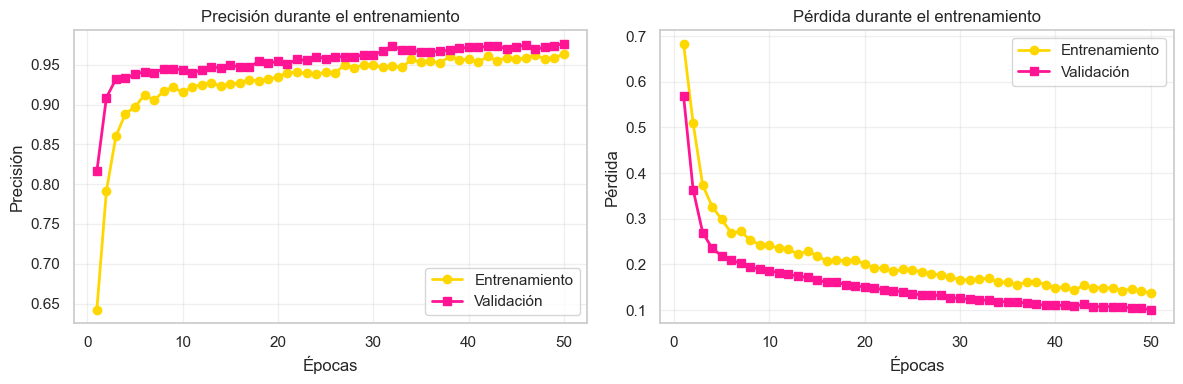

In [24]:
# PASO 6. CURVAS DE ENTRENAMIENTO -> PRECISION Y PERDIDA

# Extraer métricas del historial
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, color='#FFD700', marker='o', linewidth=2, label='Entrenamiento')  # Amarillo
plt.plot(epochs, val_acc, color='#FF1493', marker='s', linewidth=2, label='Validación')  # Rosa
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True, alpha=0.3)

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, color='#FFD700', marker='o', linewidth=2, label='Entrenamiento')  # Amarillo
plt.plot(epochs, val_loss, color='#FF1493', marker='s', linewidth=2, label='Validación')  # Rosa
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


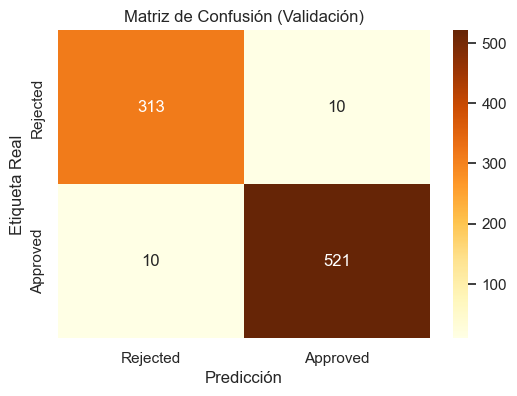

Reporte de Clasificación:
              precision    recall  f1-score   support

    Rejected       0.97      0.97      0.97       323
    Approved       0.98      0.98      0.98       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [26]:
# PASO 7. MATRIZ DE CONFUSION Y METRICAS

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predicciones (probabilidades)
y_pred_proba = model.predict(X_val)

# Convertir a clases binarias (0 o 1) con umbral 0.5
y_pred = (y_pred_proba > 0.5).astype(int)

# Matriz de confusión
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr',
            xticklabels=['Rejected', 'Approved'],
            yticklabels=['Rejected', 'Approved'])
plt.title('Matriz de Confusión (Validación)')
plt.ylabel('Etiqueta Real')
plt.xlabel('Predicción')
plt.show()

# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_val, y_pred, target_names=['Rejected', 'Approved']))

In [19]:
# Índices donde la predicción fue incorrecta
errores = X_val[y_val.values != y_pred.flatten()]

# Agregar la etiqueta real y la predicha
errores_df = pd.DataFrame(errores)
errores_df['Real'] = y_val.values[y_val.values != y_pred.flatten()]
errores_df['Predicho'] = y_pred.flatten()[y_val.values != y_pred.flatten()]

print("Ejemplos mal clasificados (primeros 5):")
errores_df.head()

Ejemplos mal clasificados (primeros 5):


,id_prestamo,num_dependientes,ingresos_anuales,monto_prestamo,plazo_prestamo,puntaje_credito,valor_bienes_residenciales,valor_bienes_comerciales,valor_bienes_lujo,valor_activos_bancarios,educacion_ Not Graduate,trabajo_independiente_ Yes,Real,Predicho
2856,0.585871,0.295621,1.154770,1.798939,-0.858444,0.429580,-0.995347,-0.768644,0.227811,0.345654,1.004461,0.992765,0,1
3160,0.832553,-0.883825,-1.232535,-1.076435,-1.208798,-1.629463,-0.503257,-0.631921,-1.200338,-1.039045,-0.995559,-1.007288,1,0
3971,1.490643,0.885344,1.047876,1.776820,-0.858444,-0.684043,1.895682,1.487277,0.777100,0.222570,-0.995559,0.992765,0,1
1199,-0.758710,-0.294102,-1.695744,-1.607273,-1.559151,-1.258255,-1.056858,-1.064876,-1.540897,-1.408298,1.004461,-1.007288,0,1
1625,-0.413031,-0.294102,1.724873,1.998003,-1.208798,-0.782645,2.895240,2.740567,1.018786,0.007172,1.004461,0.992765,1,0


In [20]:
# Índices donde la predicción fue correcta
aciertos = X_val[y_val.values == y_pred.flatten()]

# Agregar la etiqueta real y la predicha
aciertos_df = pd.DataFrame(aciertos)
aciertos_df['Real'] = y_val.values[y_val.values == y_pred.flatten()]
aciertos_df['Predicho'] = y_pred.flatten()[y_val.values == y_pred.flatten()]

print("Ejemplos bien clasificados (primeros 5):")
aciertos_df.head()

Ejemplos bien clasificados (primeros 5):


,id_prestamo,num_dependientes,ingresos_anuales,monto_prestamo,plazo_prestamo,puntaje_credito,valor_bienes_residenciales,valor_bienes_comerciales,valor_bienes_lujo,valor_activos_bancarios,educacion_ Not Graduate,trabajo_independiente_ Yes,Real,Predicho
3176,0.845536,0.885344,-0.698064,-0.766779,1.243677,-1.113252,-0.703168,-0.267328,-0.475278,-0.577479,1.004461,0.992765,0,0
477,-1.344581,-0.883825,1.047876,1.854234,0.192617,-0.556441,2.510795,-0.791431,0.766114,0.314883,-0.995559,-1.007288,0,0
4023,1.532839,-1.473548,-0.448644,-0.202764,-0.858444,0.319378,0.327145,-1.133237,-0.716965,-0.731334,1.004461,-1.007288,1,1
134,-1.622910,0.295621,-1.268167,-1.065376,0.893324,0.678985,-0.826191,-0.950940,-1.178367,-1.131358,1.004461,-1.007288,1,1
2064,-0.056802,-1.473548,0.370879,0.936327,1.594031,1.485202,-0.641657,0.051691,0.282740,0.437967,-0.995559,-1.007288,1,1


## ⚠️ Limitaciones del modelo

- El conjunto de datos utilizado es **limitado en tamaño y simplicidad**. En la vida real, los factores que afectan la aprobación de un préstamo son más complejos y pueden incluir historial crediticio detallado, comportamiento financiero o contexto económico.
- No se tuvo en cuenta un posible **desequilibrio extremo** entre clases (por ejemplo, si solo el 10% de los préstamos fueran aprobados), aunque en este caso no fue un problema.
- El modelo se limitó a una red neuronal simple. No se comparó con otros métodos más tradicionales, por lo que no podemos afirmar que sea el mejor enfoque posible.

## 🌱 Posibles mejoras futuras

- **Ajustar manualmente los parámetros del modelo** (como el número de capas, neuronas o la tasa de aprendizaje) para ver si se puede mejorar aún más su rendimiento.
- Probar con arquitecturas ligeramente más grandes (más capas o neuronas) para ver si capturan mejor patrones complejos.
- Incluir nuevas variables derivadas, como la relación entre el monto del préstamo y los ingresos anuales, para darle al modelo más información útil.
- Comparar este modelo con otros métodos más simples, como árboles de decisión o regresión logística, para entender cuál funciona mejor en este tipo de problema.
- Utilizar técnicas que ayuden a **entender por qué el modelo toma ciertas decisiones**, haciendo sus predicciones más transparentes y confiables.